### 1. Importing Libraries

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 2. Loading Dataset

In [282]:
academic_record = pd.read_csv("updated_academic_records1.csv")
parent_data = pd.read_csv("updated_parent_data.csv")
teacher = pd.read_csv("teachers.csv")
class_rooms = pd.read_csv("class_rooms.csv")
exam_result = pd.read_csv("exam_result2_updated_check.csv")
student_data = pd.read_csv("students_data.csv")
subject_averages = pd.read_csv("subject_averages.csv")

### 3. Dropping Unnecessary Features for the Potential Ones

In [283]:
student_data.drop(columns = "name", inplace = True)

In [284]:
academic_record.drop(columns = ["record_id", "student_id","department","subject_scores"], inplace = True)

In [285]:
exam_result.drop(columns = ["result_id", "student_id","department","subject_scores"], inplace = True)

In [286]:
parent_data.drop(columns = ["involvement_id", "student_id"], inplace = True)

In [287]:
teacher.drop(columns = ["teacherid", "name"], inplace = True)

In [288]:
class_rooms.drop(columns = ["classroom_id", "teacher_id", "department"], inplace = True)

In [289]:
subject_averages.drop(columns = ["student_id"], inplace = True)

In [290]:
# Initialize an empty column for Parental_Engagement_Score
parent_data['Parental_Engagement_Score'] = ''

# Iterate over each row using a for loop to create a new Parental_Engagement_Score column
for index, row in parent_data.iterrows():
    if row['attendance'] == True and row['academic_performance'] == True:
        parent_data.at[index, 'Parental_Engagement_Score'] = 'High'
    elif row['attendance'] == True and row['academic_performance'] == False:
        parent_data.at[index, 'Parental_Engagement_Score'] = 'Medium'
    elif row['attendance'] == False and row['academic_performance'] == True:
        parent_data.at[index, 'Parental_Engagement_Score'] = 'Medium'
    elif row['attendance'] == False and row['academic_performance'] == False:
        parent_data.at[index, 'Parental_Engagement_Score'] = 'Low'
        
parent_data.drop(columns = ["attendance","academic_performance"], axis = 1, inplace = True)

### 4. Joining the necessary dataset for the Modelling

In [291]:
data_africa = pd.concat([student_data,academic_record,parent_data,exam_result,subject_averages], axis = 1)
data_africa.head()

,student_id,age,gender,home_language,residential_area,household_income,department,attendance_rate,marital_status,educational_level,...,Chemistry_avg,Government_avg,Literature_in_English_avg,Physics_avg,Commerce_avg,Financial_Accounting_avg,Geography_avg,Fine_Arts_avg,Further_Mathematics_avg,Marketing_avg
0,1,18,Female,Igbo,Urban,Middle,Science,73.72,Married,Secondary,...,53.500,0.0,0.0,66.000,0.0,0.0,0.0,0.0,0.0,0.0
1,2,17,Female,Yoruba,Urban,Middle,Science,83.69,Married,Tertiary,...,62.000,0.0,0.0,48.750,0.0,0.0,0.0,0.0,0.0,0.0
2,3,16,Male,Yoruba,Rural,Middle,Science,93.88,Divorced,Primary,...,58.625,0.0,0.0,53.500,0.0,0.0,0.0,0.0,63.0,0.0
3,4,15,Male,Yoruba,Urban,Middle,Science,69.35,Married,Secondary,...,45.500,0.0,0.0,53.875,0.0,0.0,0.0,0.0,0.0,0.0
4,5,17,Male,Hausa,Rural,Middle,Science,81.67,Married,Tertiary,...,58.750,0.0,0.0,59.500,0.0,0.0,0.0,0.0,0.0,0.0


In [292]:
data_africa.describe()

,student_id,age,attendance_rate,Civic_Education_avg,Religion_Studies_avg,History_avg,Computer_Science_avg,Mathematics_avg,Economics_avg,Visual_Art_avg,...,Chemistry_avg,Government_avg,Literature_in_English_avg,Physics_avg,Commerce_avg,Financial_Accounting_avg,Geography_avg,Fine_Arts_avg,Further_Mathematics_avg,Marketing_avg
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,16.532000,80.865860,24.026000,51.05700,14.002250,4.342000,51.683000,46.357750,4.152000,...,9.176000,32.922250,14.076250,9.241250,41.869000,34.346000,19.111500,14.101000,23.288750,9.854250
std,144.481833,1.139989,11.177319,31.260207,24.50137,26.522273,15.406496,23.429143,27.452673,14.948086,...,21.073229,32.419507,26.789645,21.172708,29.846054,31.400446,29.758719,26.822582,30.979656,23.610175
min,1.000000,15.000000,60.060000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.750000,16.000000,71.870000,0.000000,50.00000,0.000000,0.000000,42.125000,39.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250.500000,17.000000,80.975000,0.000000,58.62500,0.000000,0.000000,49.875000,48.375000,0.000000,...,0.000000,41.687500,0.000000,0.000000,44.625000,41.125000,0.000000,0.000000,0.000000,0.000000
75%,375.250000,18.000000,90.647500,53.281250,61.53125,0.000000,0.000000,72.812500,71.375000,0.000000,...,0.000000,58.750000,0.000000,0.000000,69.218750,53.906250,49.656250,0.000000,52.875000,0.000000
max,500.000000,18.000000,99.990000,89.250000,89.62500,86.625000,74.250000,89.875000,93.125000,74.250000,...,78.125000,93.250000,92.625000,77.500000,91.500000,92.625000,87.625000,89.750000,87.500000,86.875000


### 6. Creating Science Student Dataset

In [293]:
science_dataset = data_africa[['age', 'attendance_rate', 'Parental_Engagement_Score','attendance_category',"Mathematics_avg", "English_avg", 
"Physics_avg", "Chemistry_avg",'gender','household_income','home_language', 'residential_area', 'pass_or_fail']]

science_dataset["Average_Score"] = science_dataset[['Mathematics_avg', 'English_avg', 'Physics_avg','Chemistry_avg']].mean(axis = 1)

science_dataset.head()

,age,attendance_rate,Parental_Engagement_Score,attendance_category,Mathematics_avg,English_avg,Physics_avg,Chemistry_avg,gender,household_income,home_language,residential_area,pass_or_fail,Average_Score
0,18,73.72,Medium,Medium,51.625,53.875,66.000,53.500,Female,Middle,Igbo,Urban,Fail,56.25000
1,17,83.69,High,High,55.500,55.250,48.750,62.000,Female,Middle,Yoruba,Urban,Pass,55.37500
2,16,93.88,High,High,57.750,65.375,53.500,58.625,Male,Middle,Yoruba,Rural,Pass,58.81250
3,15,69.35,High,Medium,48.625,54.000,53.875,45.500,Male,Middle,Yoruba,Urban,Fail,50.50000
4,17,81.67,Medium,High,57.125,57.750,59.500,58.750,Male,Middle,Hausa,Rural,Pass,58.28125


### 7. Creating Commercial Student Dataset

In [294]:
commercial_dataset = data_africa[['age', 'attendance_rate', 'Parental_Engagement_Score','attendance_category',"Mathematics_avg", "English_avg",
"Financial_Accounting_avg", "Economics_avg","Commerce_avg",'gender','household_income', 'home_language','residential_area', 'pass_or_fail']]

commercial_dataset["Average_Score"] = commercial_dataset[['Mathematics_avg', 'English_avg', "Financial_Accounting_avg", "Economics_avg","Commerce_avg"]].mean(axis = 1)

commercial_dataset.head()

,age,attendance_rate,Parental_Engagement_Score,attendance_category,Mathematics_avg,English_avg,Financial_Accounting_avg,Economics_avg,Commerce_avg,gender,household_income,home_language,residential_area,pass_or_fail,Average_Score
0,18,73.72,Medium,Medium,51.625,53.875,0.0,0.000,0.0,Female,Middle,Igbo,Urban,Fail,21.100
1,17,83.69,High,High,55.500,55.250,0.0,51.375,0.0,Female,Middle,Yoruba,Urban,Pass,32.425
2,16,93.88,High,High,57.750,65.375,0.0,0.000,0.0,Male,Middle,Yoruba,Rural,Pass,24.625
3,15,69.35,High,Medium,48.625,54.000,0.0,0.000,0.0,Male,Middle,Yoruba,Urban,Fail,20.525
4,17,81.67,Medium,High,57.125,57.750,0.0,0.000,0.0,Male,Middle,Hausa,Rural,Pass,22.975


### 8. Creating Art Dataset

In [295]:
Art_dataset = data_africa[['age', 'attendance_rate', 'Parental_Engagement_Score','attendance_category','Literature_in_English_avg',
'English_avg','Religion_Studies_avg','History_avg','Government_avg','gender','household_income', 
'home_language','residential_area', 'pass_or_fail']]

Art_dataset["Average_Score"] = Art_dataset[['Literature_in_English_avg','English_avg','Religion_Studies_avg','History_avg','Government_avg']].mean(axis = 1)

Art_dataset.head()

,age,attendance_rate,Parental_Engagement_Score,attendance_category,Literature_in_English_avg,English_avg,Religion_Studies_avg,History_avg,Government_avg,gender,household_income,home_language,residential_area,pass_or_fail,Average_Score
0,18,73.72,Medium,Medium,0.0,53.875,0.0,0.0,0.0,Female,Middle,Igbo,Urban,Fail,10.775
1,17,83.69,High,High,0.0,55.250,0.0,0.0,0.0,Female,Middle,Yoruba,Urban,Pass,11.050
2,16,93.88,High,High,0.0,65.375,0.0,0.0,0.0,Male,Middle,Yoruba,Rural,Pass,13.075
3,15,69.35,High,Medium,0.0,54.000,0.0,0.0,0.0,Male,Middle,Yoruba,Urban,Fail,10.800
4,17,81.67,Medium,High,0.0,57.750,0.0,0.0,0.0,Male,Middle,Hausa,Rural,Pass,11.550


### 9. EDA for the Science Students Dataset

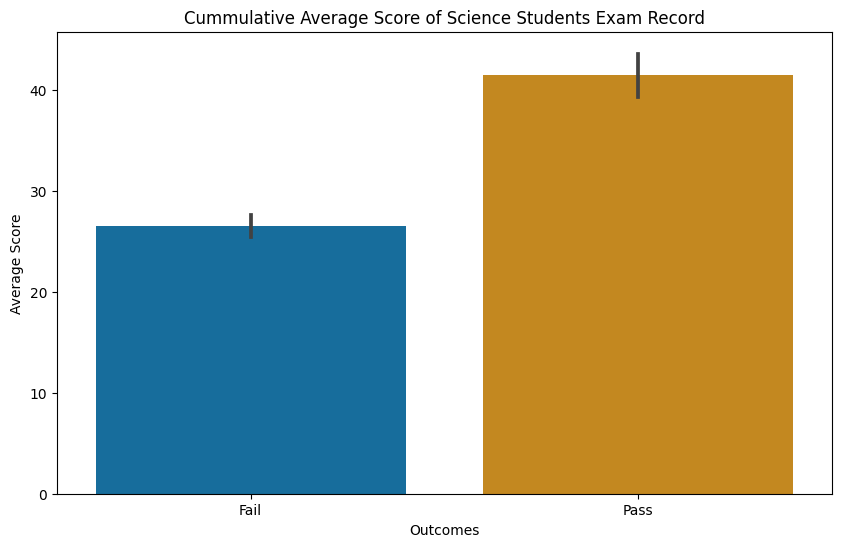

In [296]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pass_or_fail', y='Average_Score', data=science_dataset, palette='colorblind')
plt.title('Cummulative Average Score of Science Students Exam Record')
plt.xlabel('Outcomes')
plt.ylabel('Average Score')
plt.show()

#### Cummulative Average Scores for each science students gives an overall measure of their performance across all subjects. Student with a cummulative average score above 40 are deemed to have passed, while those below 30 have failed.

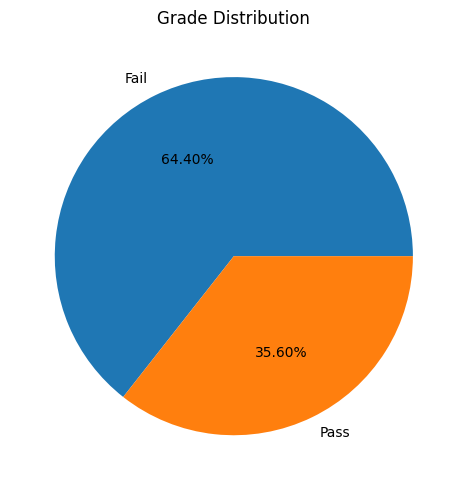

In [297]:
x = science_dataset["pass_or_fail"].value_counts()
labels = science_dataset["pass_or_fail"].value_counts().index.tolist()

plt.figure(figsize=(6,5))
plt.pie(x = x, labels = labels, autopct = "%1.2f%%")
plt.title("Grade Distribution")
plt.tight_layout()
plt.show()

#### The piechart analysis from the science students data show that 64.4% failed while 35.6% passed.

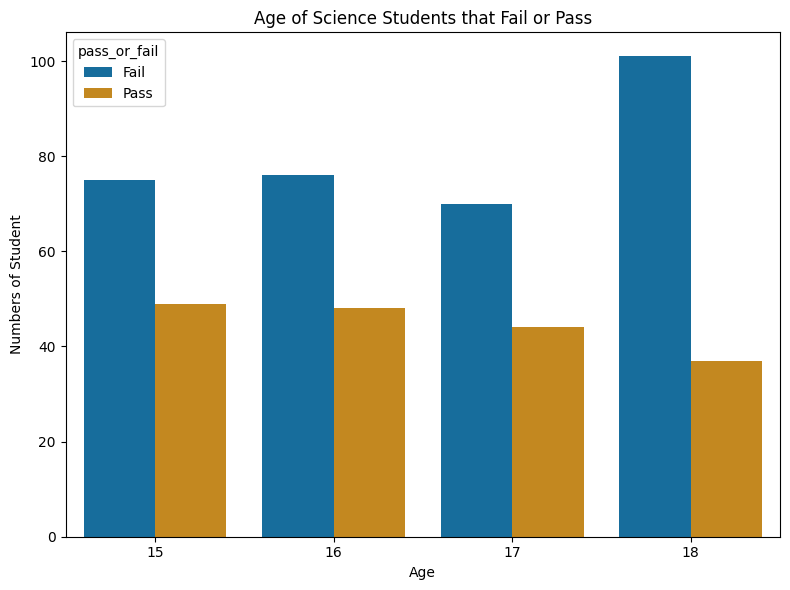

In [298]:
plt.figure(figsize = (8,6))
sns.countplot(data =science_dataset , x = "age", hue = "pass_or_fail", palette = "colorblind")
plt.title("Age of Science Students that Fail or Pass")
plt.xlabel('Age')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The age of student shows little significant effect on the performance of science students, but it was observerd that students at the age of 18 deemed to have failed more.  

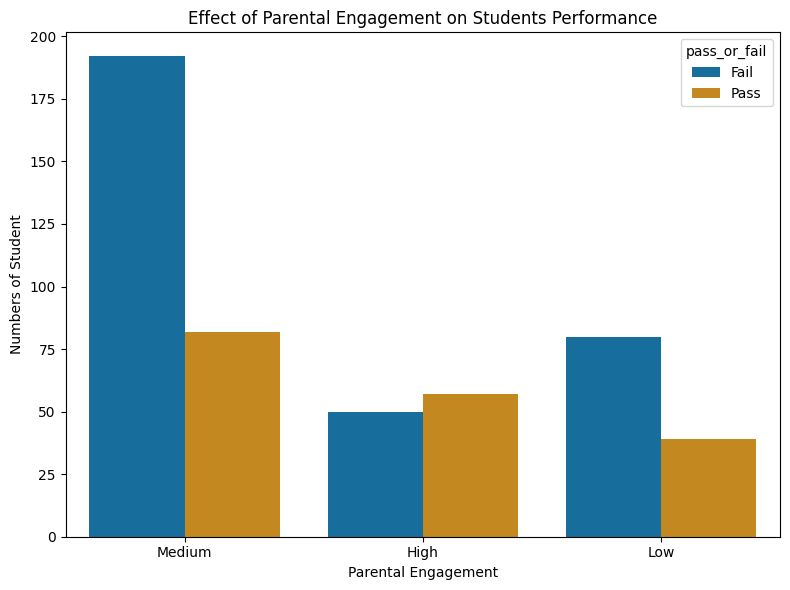

In [299]:
plt.figure(figsize = (8,6))
sns.countplot(data =science_dataset , x = "Parental_Engagement_Score", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Parental Engagement on Students Performance")
plt.xlabel('Parental Engagement')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from science students data shows that student with medium parental involvement tends to have lower performance as the majority of students that failed fall into this category. 

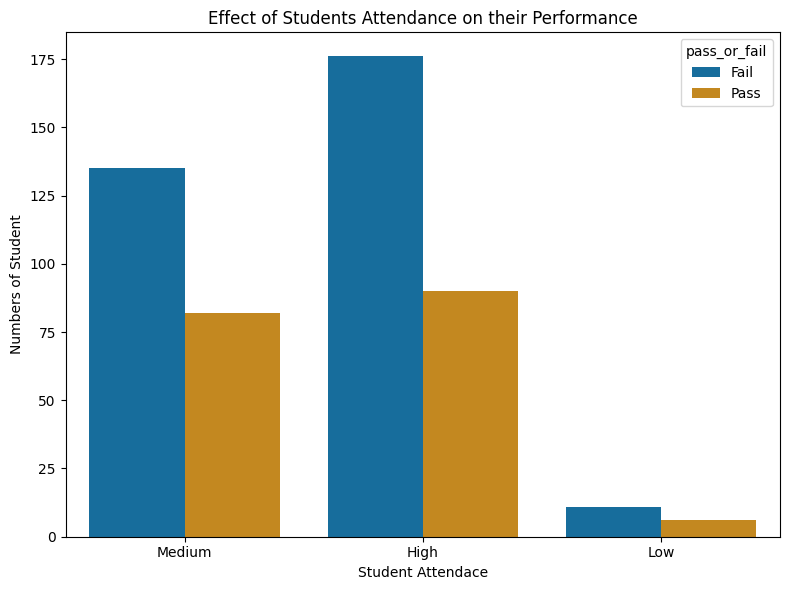

In [300]:
plt.figure(figsize = (8,6))
sns.countplot(data =science_dataset , x = "attendance_category", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Students Attendance on their Performance")
plt.xlabel('Student Attendace')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from science students data shows that most students attendance rates fall in the category of high and medium. It was observed that  majority of students that passed and failed have high and medium attendace rates.   

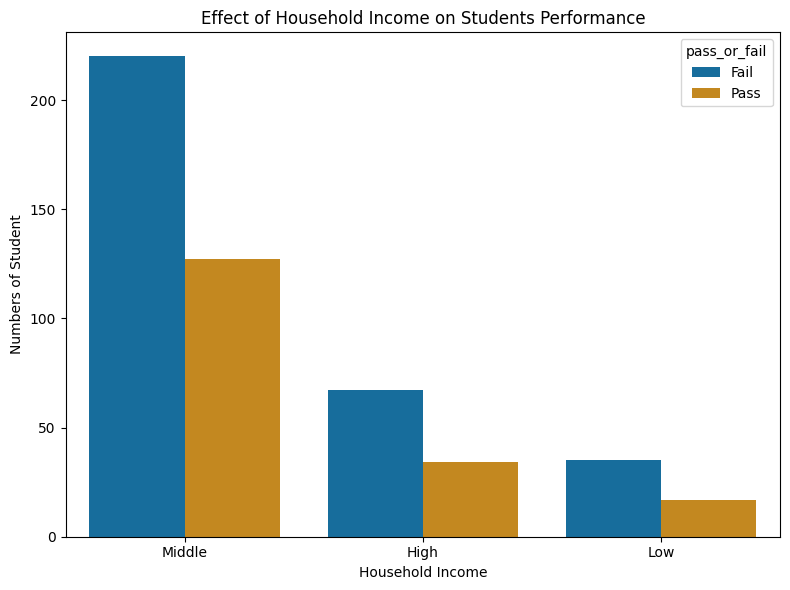

In [301]:
plt.figure(figsize = (8,6))
sns.countplot(data =science_dataset , x = "household_income", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Household Income on Students Performance")
plt.xlabel('Household Income')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from science students data shows that; high and low household income rates have no significant effect on students performance while students with household income rates that fall in the middle category shows a great significant effect on their perfromance.

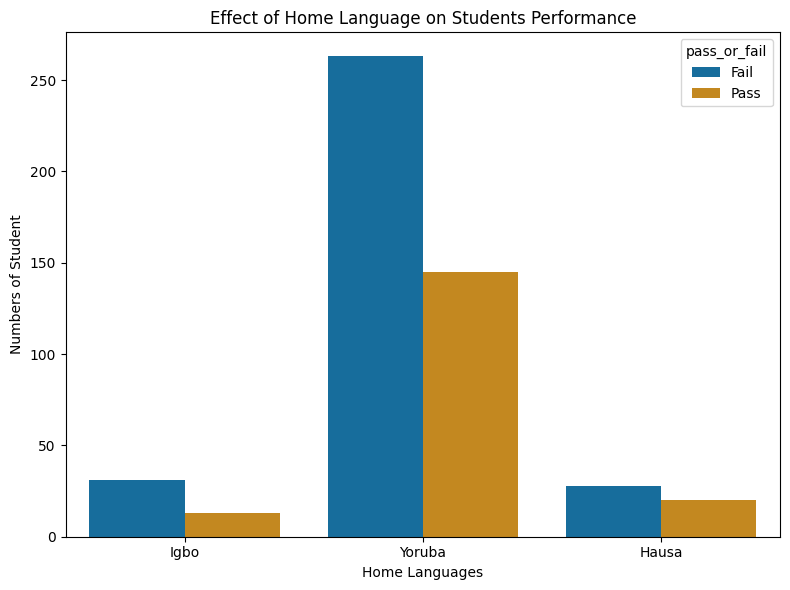

In [302]:
plt.figure(figsize = (8,6))
sns.countplot(data =science_dataset , x = "home_language", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Home Language on Students Performance")
plt.xlabel('Home Languages')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from science students data shows that; students that failed and passed most belongs to the yoruba tribe.

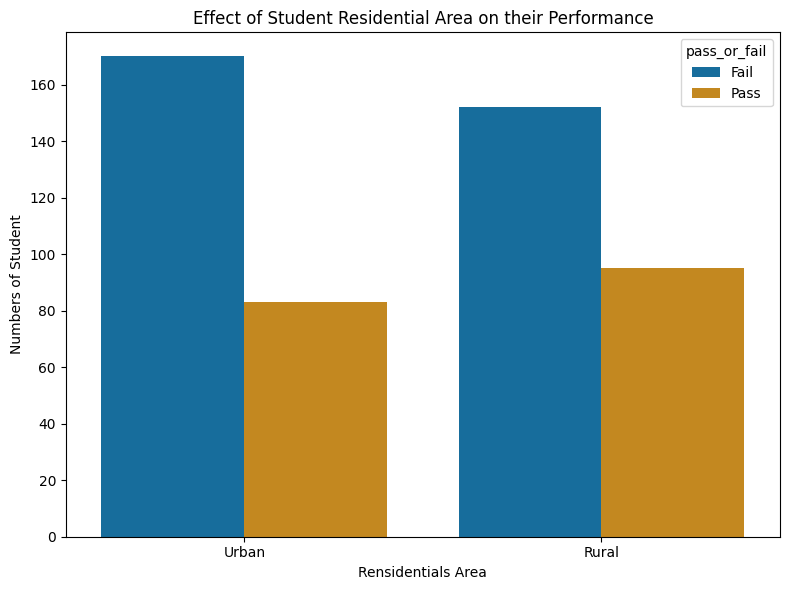

In [303]:
plt.figure(figsize = (8,6))
sns.countplot(data =science_dataset , x = "residential_area", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Student Residential Area on their Performance")
plt.xlabel('Rensidentials Area')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from science students data shows that; students residing in the urban area failed most while students residing in the rural passed most area.

### 10. EDA for the Commercial Students Dataset

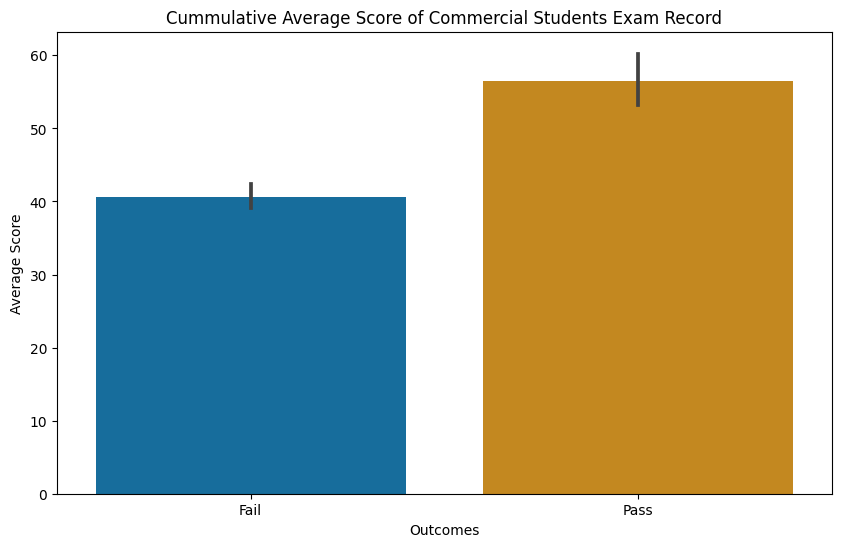

In [304]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pass_or_fail', y='Average_Score', data=commercial_dataset, palette='colorblind')
plt.title('Cummulative Average Score of Commercial Students Exam Record')
plt.xlabel('Outcomes')
plt.ylabel('Average Score')
plt.show()

#### Cummulative Average Scores for each commercial students gives an overall measure of their performance across all subjects. Student with a cummulative average score above 55 are deemed to have passed, while those below 42 have failed.

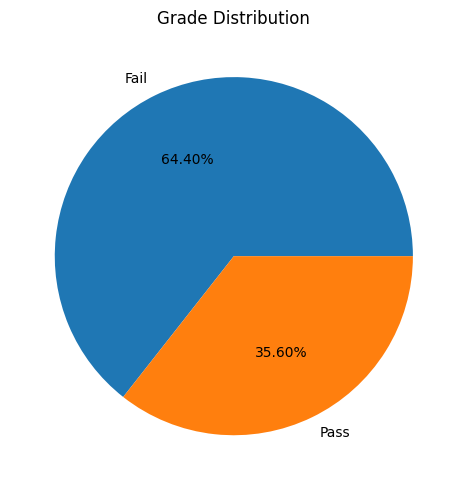

In [305]:
x = commercial_dataset["pass_or_fail"].value_counts()
labels = commercial_dataset["pass_or_fail"].value_counts().index.tolist()

plt.figure(figsize=(6,5))
plt.pie(x = x, labels = labels, autopct = "%1.2f%%")
plt.title("Grade Distribution")
plt.tight_layout()
plt.show()

#### The piechart analysis from the commercial students data show that 64.4% failed while 35.6% passed.

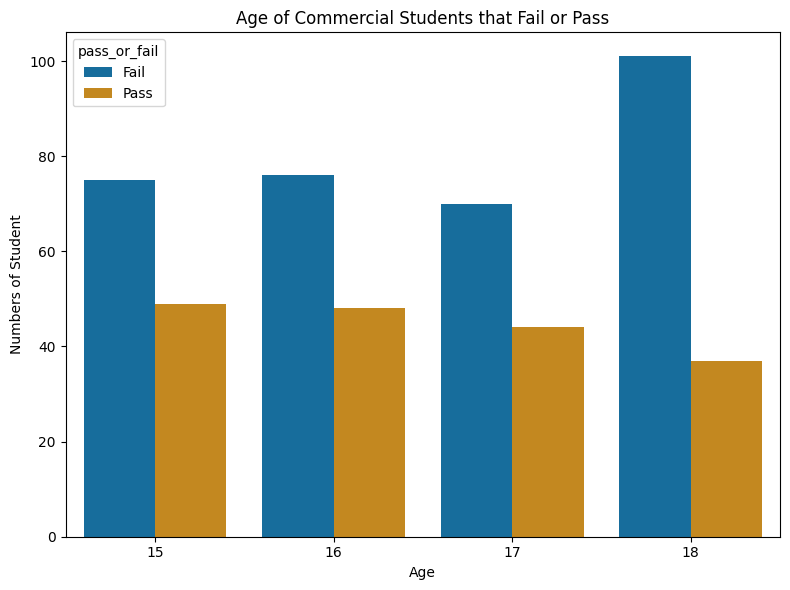

In [306]:
plt.figure(figsize = (8,6))
sns.countplot(data =commercial_dataset , x = "age", hue = "pass_or_fail", palette = "colorblind")
plt.title("Age of Commercial Students that Fail or Pass")
plt.xlabel('Age')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The age of student shows little significant effect on the performance of commercial students, but it was observerd that students at the age of 18 deemed to have failed more.  

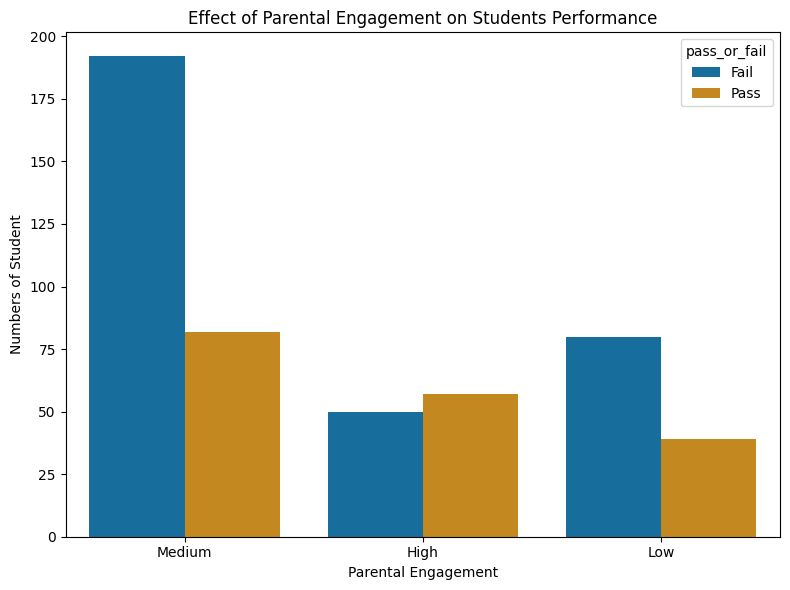

In [307]:
plt.figure(figsize = (8,6))
sns.countplot(data =commercial_dataset , x = "Parental_Engagement_Score", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Parental Engagement on Students Performance")
plt.xlabel('Parental Engagement')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from commercial students data shows that student with medium parental involvement tends to have lower performance as the majority of students that failed fall into this category.

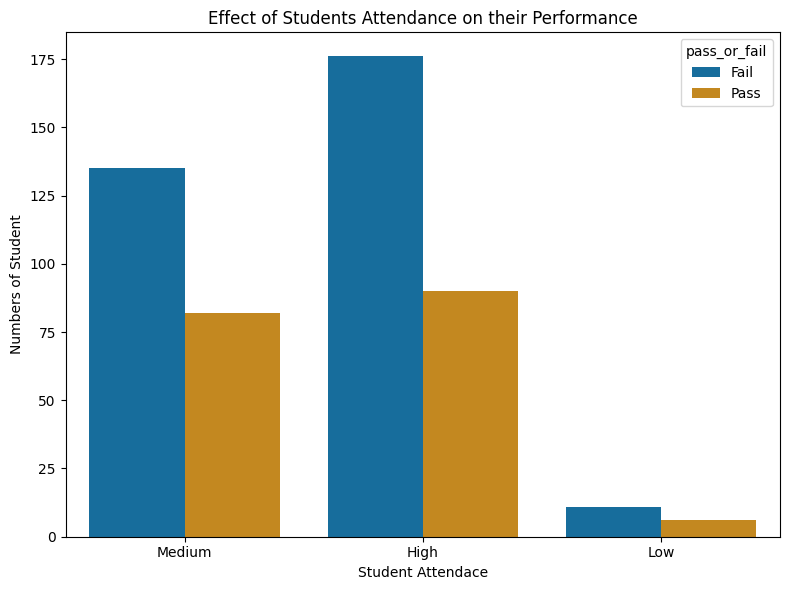

In [308]:
plt.figure(figsize = (8,6))
sns.countplot(data =commercial_dataset , x = "attendance_category", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Students Attendance on their Performance")
plt.xlabel('Student Attendace')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from commercial students data shows that most students attendance rates fall in the category of high and medium. It was observed that;  majority of students that passed and failed have high and medium attendace rates.

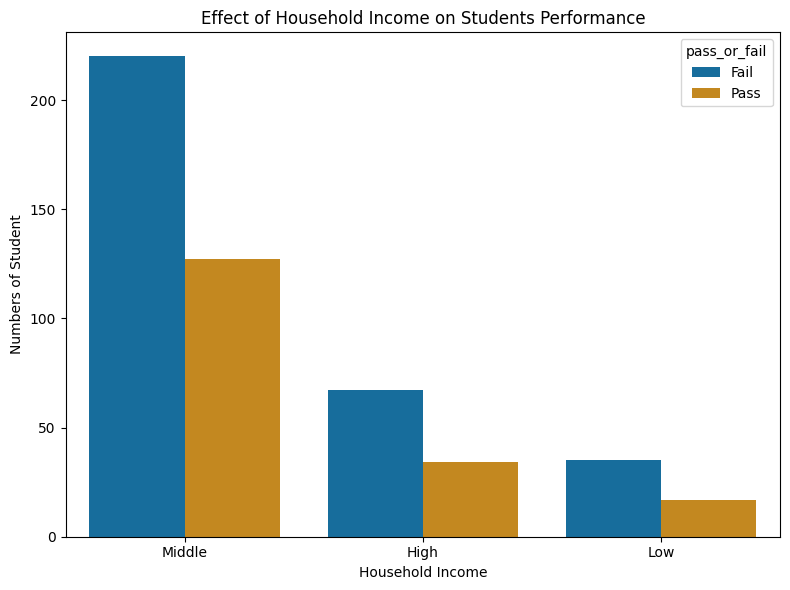

In [309]:
plt.figure(figsize = (8,6))
sns.countplot(data =commercial_dataset , x = "household_income", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Household Income on Students Performance")
plt.xlabel('Household Income')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from commercial students data shows that; high and low household income rates have no significant effect on students performance while students with household income rates that fall in the middle category shows a great significant effect on their perfromance.

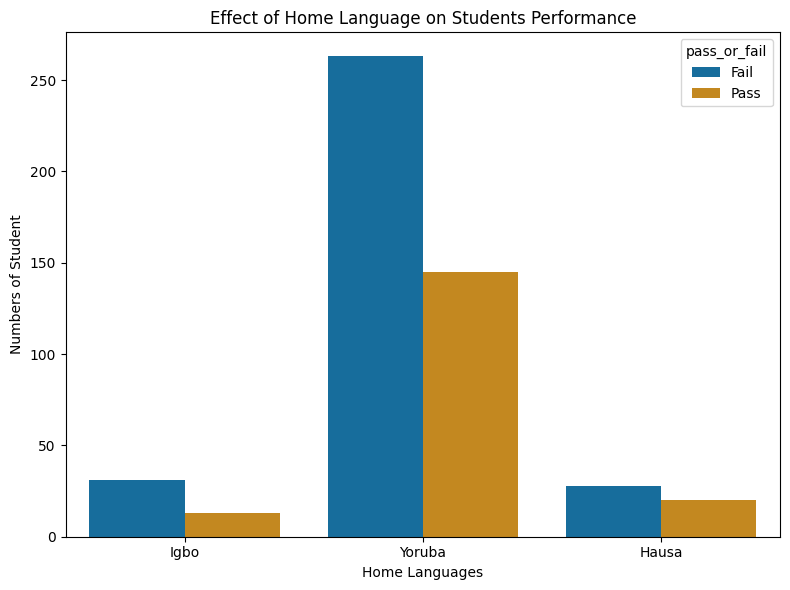

In [310]:
plt.figure(figsize = (8,6))
sns.countplot(data =commercial_dataset , x = "home_language", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Home Language on Students Performance")
plt.xlabel('Home Languages')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from commercial students data shows that; students that failed and passed most belongs to the yoruba tribe.

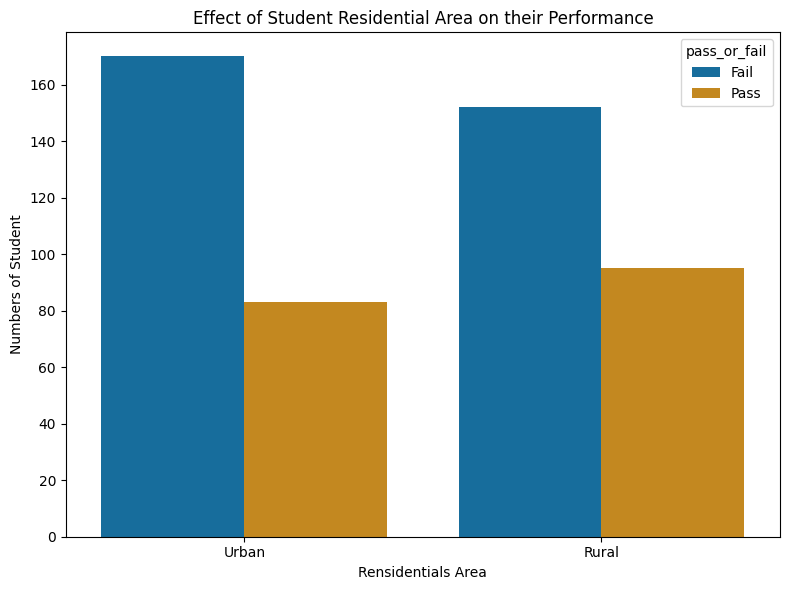

In [311]:
plt.figure(figsize = (8,6))
sns.countplot(data =commercial_dataset , x = "residential_area", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Student Residential Area on their Performance")
plt.xlabel('Rensidentials Area')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from commercial students data shows that; students residing in the urban area failed most while students residing in the rural passed most area.

### 11. EDA for the Art Students Dataset

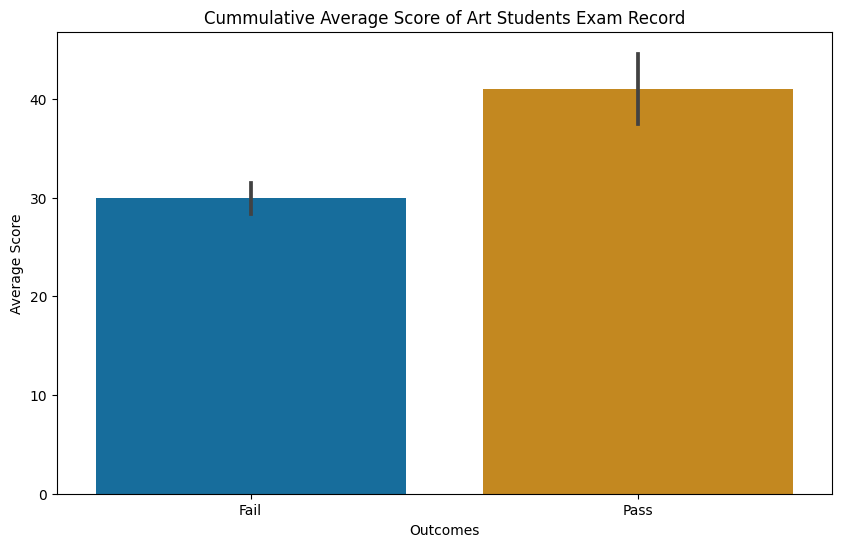

In [312]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pass_or_fail', y='Average_Score', data=Art_dataset, palette='colorblind')
plt.title('Cummulative Average Score of Art Students Exam Record')
plt.xlabel('Outcomes')
plt.ylabel('Average Score')
plt.show()

#### Cummulative Average Scores for each art students gives an overall measure of their performance across all subjects. Student with a cummulative average score above 40 are deemed to have passed, while those with 30 and below have failed.

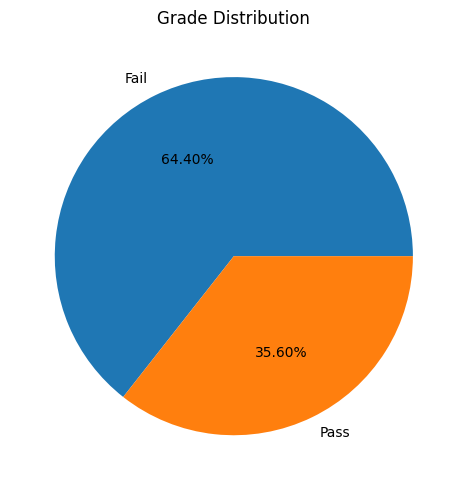

In [313]:
x = Art_dataset["pass_or_fail"].value_counts()
labels = commercial_dataset["pass_or_fail"].value_counts().index.tolist()

plt.figure(figsize=(6,5))
plt.pie(x = x, labels = labels, autopct = "%1.2f%%")
plt.title("Grade Distribution")
plt.tight_layout()
plt.show()

#### The piechart analysis from the art students data show that 64.4% failed while 35.6% passed.

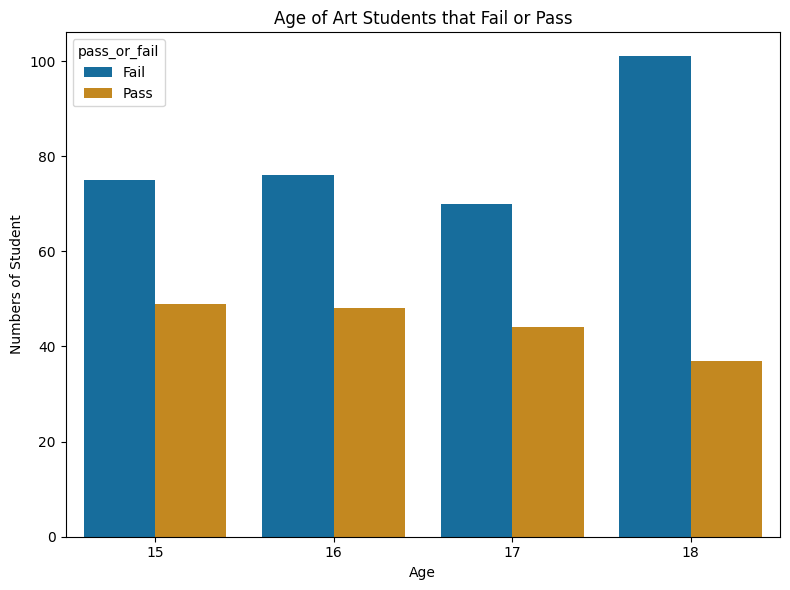

In [314]:
plt.figure(figsize = (8,6))
sns.countplot(data =Art_dataset , x = "age", hue = "pass_or_fail", palette = "colorblind")
plt.title("Age of Art Students that Fail or Pass")
plt.xlabel('Age')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The age of student shows little significant effect on the performance of art students, but it was observerd that students at the age of 18 deemed to have failed more.  

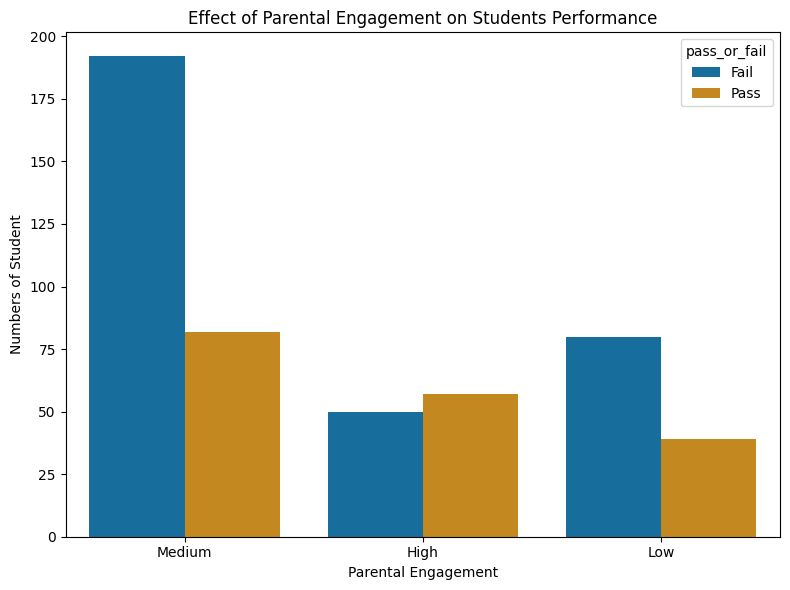

In [315]:
plt.figure(figsize = (8,6))
sns.countplot(data = Art_dataset , x = "Parental_Engagement_Score", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Parental Engagement on Students Performance")
plt.xlabel('Parental Engagement')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from art students data shows that student with medium parental involvement tends to have lower performance as the majority of students that failed fall into this category.

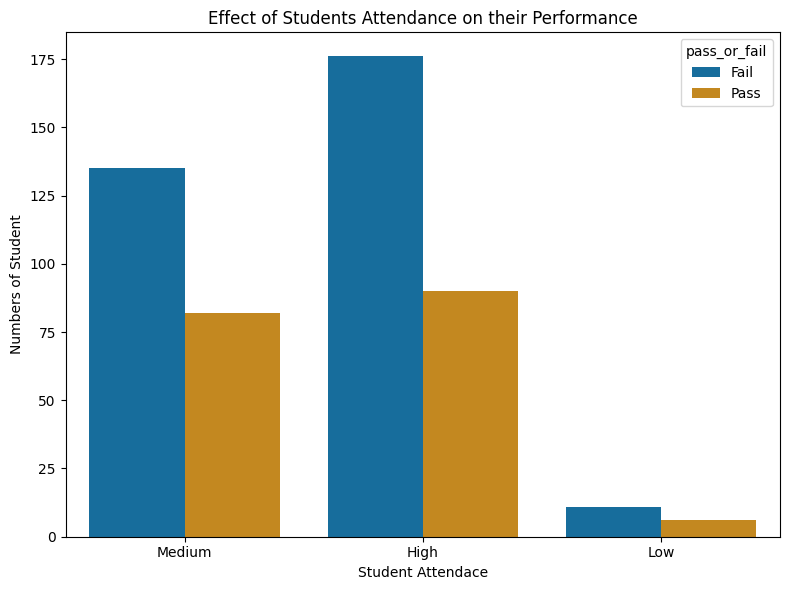

In [316]:
plt.figure(figsize = (8,6))
sns.countplot(data = Art_dataset , x = "attendance_category", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Students Attendance on their Performance")
plt.xlabel('Student Attendace')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from art students data shows that most students attendance rates fall in the category of high and medium. It was observed that;  majority of students that passed and failed have high and medium attendace rates.

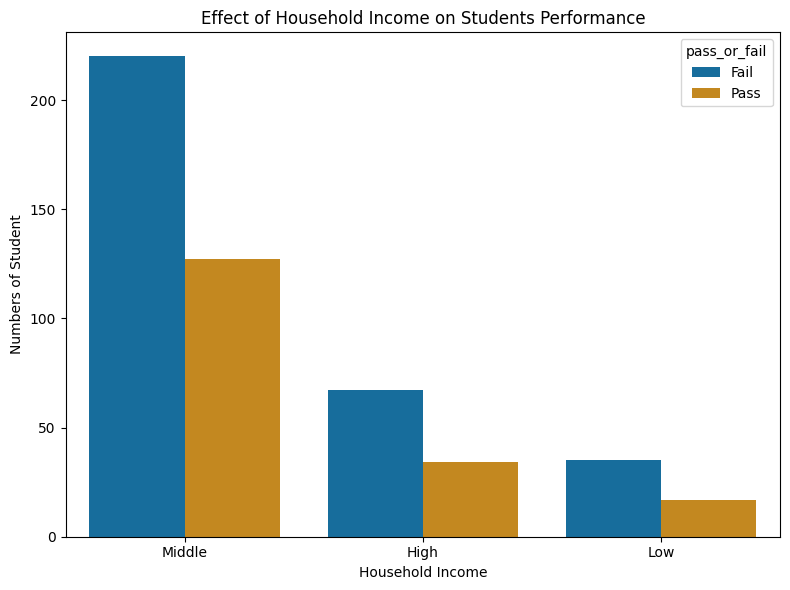

In [317]:
plt.figure(figsize = (8,6))
sns.countplot(data = Art_dataset , x = "household_income", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Household Income on Students Performance")
plt.xlabel('Household Income')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from art students data shows that; high and low household income rates have no significant effect on students performance while students with household income rates that fall in the middle category shows a great significant effect on their perfromance.

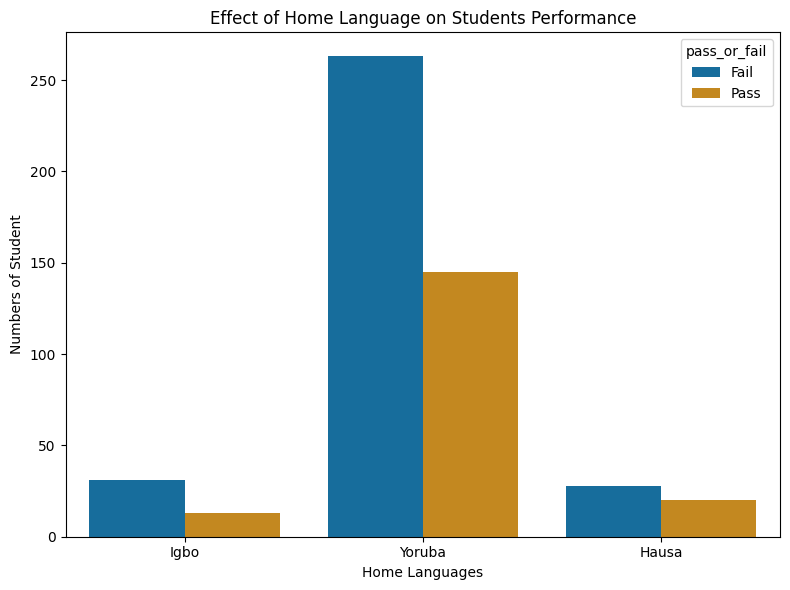

In [318]:
plt.figure(figsize = (8,6))
sns.countplot(data =Art_dataset , x = "home_language", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Home Language on Students Performance")
plt.xlabel('Home Languages')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from art students data shows that; students that failed and passed most belongs to the yoruba tribe.

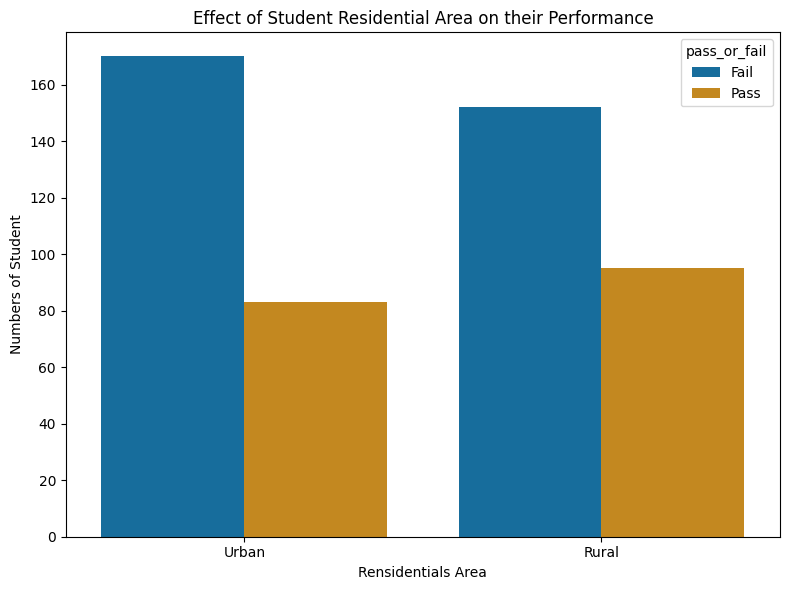

In [319]:
plt.figure(figsize = (8,6))
sns.countplot(data = Art_dataset , x = "residential_area", hue = "pass_or_fail", palette = "colorblind")
plt.title("Effect of Student Residential Area on their Performance")
plt.xlabel('Rensidentials Area')
plt.ylabel('Numbers of Student')
plt.tight_layout()
plt.show()

#### The analysis from art students data shows that; students residing in the urban area failed most while students residing in the rural passed most area.